# Travel Review Dataset 
The dataset has been taken from the University of California Irvine machine learning repository and can be downloaded from [here](https://archive.ics.uci.edu/ml/datasets/Travel+Reviews#:~:text=UCI%20Machine%20Learning%20Repository%3A%20Travel%20Reviews%20Data%20Set&text=Abstract%3A%20Reviews%20on%20destinations%20in,and%20average%20rating%20is%20used).

It contains reviews of East Asian destinations across 10 categories.

Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0); and average rating is used.

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

# Import The Dataset

Let's first import the csv dataset, which is in the data/ directory.

The dataset attributes are summarised in the following table: 

| Variable  | Meaning |
| ------------- | ------------- | 
|Attribute 1  | Unique user id  |
|Category 1| Average user feedback on art galleries | 
|Category 2 | Average user feedback on dance clubs | 
|Category 3| Average user feedback on juice bars |
|Category 4| Average user feedback on restaurants | 
|Category 5| Average user feedback on museums |
|Category 6| Average user feedback on resorts |
|Category 7| Average user feedback on parks/picnic spots |
|Category 8| Average user feedback on beaches |
|Category 9| Average user feedback on theatres |
|Category 10| Average user feedback on religious institutions | 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Q1. Load the dataset called `tripadvisor_review.csv` into a DataFrame called`df`.**


Call the `.info()` method to view its concise summary.

In [2]:
# Add your code below
df = pd.read_csv("data/tripadvisor_review.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


# Preprocess the dataset 

**Q2. Remove the first column, `User ID`, from the DataFrame.**


Before doing this, make a copy of `df`, named `df_new`, and work on `df_new`. 

*Hint: Use the `.drop()` method to remove columns from the DataFrame.*

In [3]:
# Add your code below
df_new = df.copy()
df_new = df_new.drop(columns=['User ID'])


**Q3. Using `df_new`, scale its values between 0 and 1 using a *min_max* scaler. 
Save the new scaled dataset to a new DataFrame named `df_scaled`.**


*Hint: The min-max scaling formula is as follows:* 

$$
df\_scaled = \frac{original\_df \ - \ min\_val\_original\_df}{max\_val\_original\_df \ - \ min\_val\_original\_df}
$$


In [4]:
# Add your code below
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled, columns=df_new.columns)
df_scaled.head()


,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.204861,0.494505,0.618911,0.142857,0.228395,0.629834,0.6,0.381443,0.444444,0.184211
1,0.236111,0.604396,0.724928,0.148936,0.419753,0.839779,1.0,0.216495,0.460905,0.118421
2,0.305556,0.219780,0.117479,0.115502,0.055556,0.386740,0.4,0.391753,0.234568,0.236842
3,0.038194,0.494505,0.045845,0.127660,0.123457,0.381215,0.4,0.556701,0.341564,0.473684
4,0.059028,0.329670,0.300860,0.127660,0.456790,0.519337,0.4,0.371134,0.181070,0.263158


# Clustering 

It's time to try some clustering. 

Let's start with K-Means and let's see how the clusters look. 

We will use the package `KMeans` from `sklearn.cluster` which we imported earlier.

**Q4. Run K-Means with 2 clusters. Save the model into a variable called `kmeans2`, and fit it to `df_scaled`.**


**Note**: When initalizing the `KMeans` object, specify `random_state = 8`.

In [5]:
# Add your code below
kmeans2 = KMeans(n_clusters=2, random_state=8)
kmeans2.fit(df_scaled)


KMeans(n_clusters=2, random_state=8)

**Q5. Save the centroids predicted by the K-Means clusters in a variable called `kmeans2_centres`.**


As you know, the way the K-Means algorithm works is by estimating the centroids of the clusters requested at each iteration. 

*Hint: You can access this information using the attribute `cluster_centers_` of the fitted model.* 

In [6]:
# Add your code below
kmeans2_centres = kmeans2.cluster_centers_


**Q6. Create a copy of `df_scaled` and call it `df_scaled_predictions_2`. Add to this DataFrame a column, called `predicted_kMeans_2`, with the the values of the labels assigned with `kmeans2`.**


*Hint: You can access this information using the attribute `labels_` of the fitted model.*

In [7]:
# Add your code below
df_scaled_predictions_2 = df_scaled.copy()
df_scaled_predictions_2['predicted_kMeans_2'] = kmeans2.labels_


**Q7. Create a DataFrame with all the rows that belong to *cluster 0* and store it in a variable called `df_k2_cluster_0`.
Then create a DataFrame with all the rows that belong to *cluster 1* and store it in a variable called `df_k2_cluster_1`.**


*Note: in these DataFrames there shouldn't be the column `predicted_kMeans_2`.*

In [8]:
# Add your code below
df_k2_cluster_0 = df_scaled_predictions_2[df_scaled_predictions_2['predicted_kMeans_2'] == 0].drop(columns="predicted_kMeans_2")
df_k2_cluster_1 = df_scaled_predictions_2[df_scaled_predictions_2['predicted_kMeans_2'] == 1].drop(columns="predicted_kMeans_2")


**Q8. Plot the histograms of all the categories of `df_k2_cluster_0` and `df_k2_cluster_1`.**


Once you have plotted them, you can visually compare the histograms and see which categories' distribution is different between the two clusters. 

Assign the two plots to the variables called `hist_k2_cluster_0` and  `hist_k2_cluster_1` respectively.

*Hint: use the `.hist()` method on the DataFrame of interest and use `bins = 13`.*

*The library `matplotlib.pyplot` (which we imported earlier with the alias `plt`) has a `.tight_layout()` method, which you can use after each call of the `.hist()` method to create a nice layout of the histograms produced.*

<Figure size 640x480 with 0 Axes>

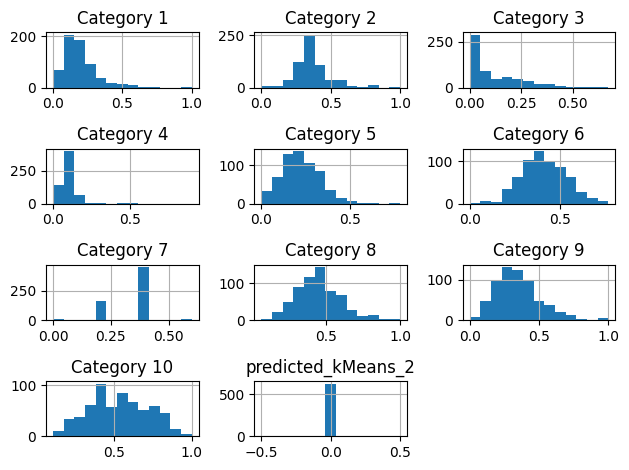

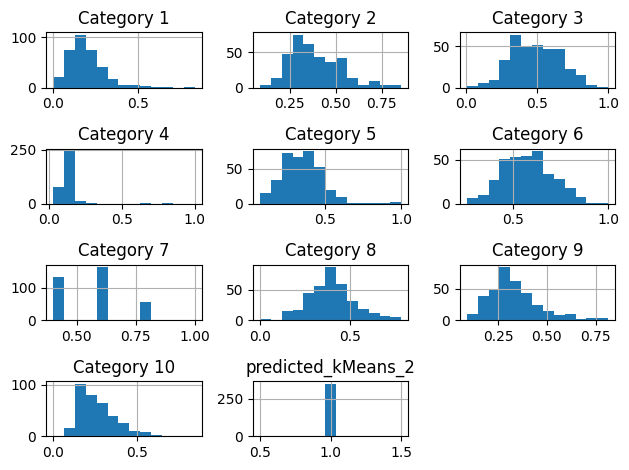

In [9]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()
# Add your code below
hist_k2_cluster_0 = df_k2_cluster_0.hist(bins =13)
plt.tight_layout()
hist_k2_cluster_1 = df_k2_cluster_1.hist(bins=13)
plt.tight_layout()


From the histograms, we can see that two categories are highly different between the two clusters - Category 3 and Category 10. 

**Q9. Make boxplots of Category 3 and Category 10, grouping by `predicted_kMeans_2`. Store your plots in two variables called `box_plot3_k2` and `box_plot10_k2` respectively.**


*Hint: In this case you should use `df_scaled_predictions_2`.*

*Use the `plt.suptitle("")` method after each call to the `.boxplot()` method, to create a better visualization of the plots.*

Text(0.5, 0.98, '')

<Figure size 640x480 with 0 Axes>

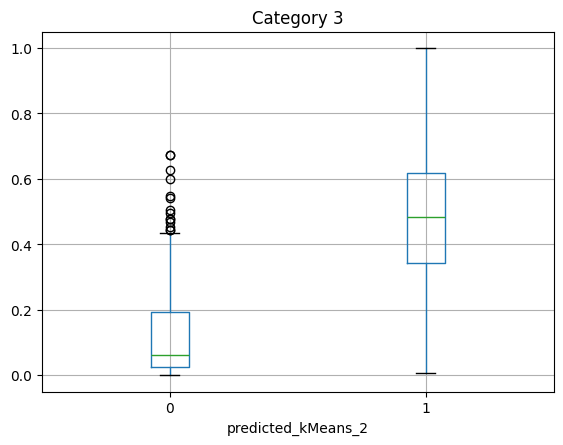

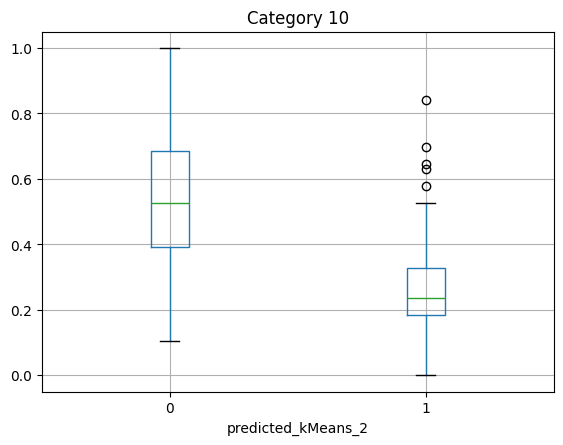

In [10]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()
# Add your code below
box_plot3_k2 = df_scaled_predictions_2.boxplot(column=['Category 3'], by='predicted_kMeans_2')
plt.suptitle("")
box_plot10_k2 = df_scaled_predictions_2.boxplot(column=['Category 10'], by='predicted_kMeans_2')
plt.suptitle("")


In the model there are some parameters which can be tweaked. Let's change number of clusters and some of the parameters to see if the results change. 

**Q10. Run K-Means with 4 clusters. Change the parameter `max_iter` to 400 and and fit it to `df_scaled`. Call the variable where the model is saved `kmeans4`.**


**Note**: When initalizing the `KMeans` object, specify `random_state = 8`.

In [11]:
# Add your code below
kmeans4 = KMeans(n_clusters = 4, max_iter = 400, random_state=8)
kmeans4.fit(df_scaled)

KMeans(max_iter=400, n_clusters=4, random_state=8)

**Q11. Create a copy of `df_scaled` and call it `df_scaled_predictions_4`. Add to this DataFrame a column, called `predicted_kMeans_4` with the values of the labels assigned with `kmeans4`.**


*Hint: You can access this information using the attribute `labels_` of the fitted model.*

In [12]:
# Add your code below
df_scaled_predictions_4 = df_scaled.copy()
df_scaled_predictions_4['predicted_kMeans_4'] = kmeans4.labels_


**Q12. Based on the prediction in column `predicted_kMeans_4`, create 4 DataFrames. One with all the rows that belong to *cluster 0*, one with all the rows that belong to *cluster 1*, one with all the rows that belong to *cluster 2*, and one with all the rows that belong to *cluster 3*. Save these DataFrames to the variables `df_k4_cluster_0`, `df_k4_cluster_1`, `df_k4_cluster_2`, and `df_k4_cluster_3` respectively.**


*Note: in these DataFrames there shouldn't be column `predicted_kMeans_4`.*

In [13]:
# Add your code below
df_k4_cluster_0 = df_scaled_predictions_4[df_scaled_predictions_4['predicted_kMeans_4'] == 0].drop(columns="predicted_kMeans_4")
df_k4_cluster_1 = df_scaled_predictions_4[df_scaled_predictions_4['predicted_kMeans_4'] == 1].drop(columns="predicted_kMeans_4")
df_k4_cluster_2 = df_scaled_predictions_4[df_scaled_predictions_4['predicted_kMeans_4'] == 2].drop(columns="predicted_kMeans_4")
df_k4_cluster_3 = df_scaled_predictions_4[df_scaled_predictions_4['predicted_kMeans_4'] == 3].drop(columns="predicted_kMeans_4")


**Q13. Plot the histograms of all the categories of `df_k4_cluster_0`, `df_k4_cluster_1`,`df_k4_cluster_2`, and `df_k4_cluster_3`.**


Once you have plotted them, you can visually compare the histograms and see which categories' distribution is different between the four clusters.

Assign the four plots to the variables `hist_k4_cluster_0`, `hist_k4_cluster_1`,`hist_k4_cluster_2`, and `hist_k4_cluster_3` respectively.

*Hint: use the `.hist()` method on the DataFrame of interest and use `bins = 13`.*

*The library `matplotlib.pyplot` (which we imported earlier with the alias `plt`) has a `.tight_layout()` method, which you can use after each call of the `.hist()` method to create a nice layout of the histograms produced.*

<Figure size 640x480 with 0 Axes>

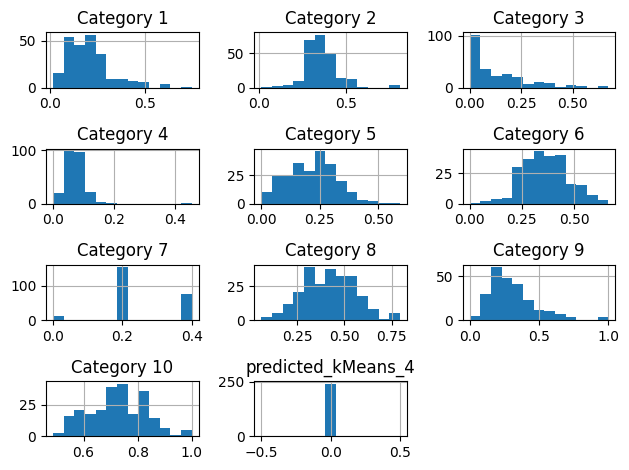

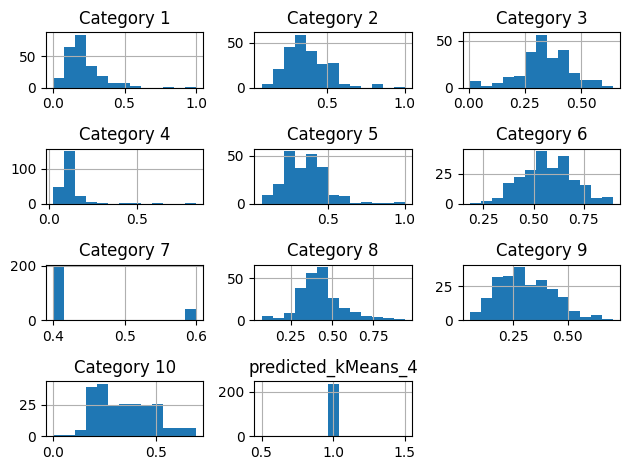

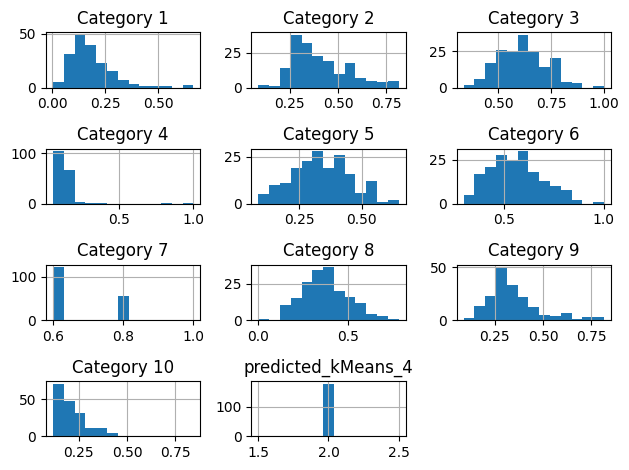

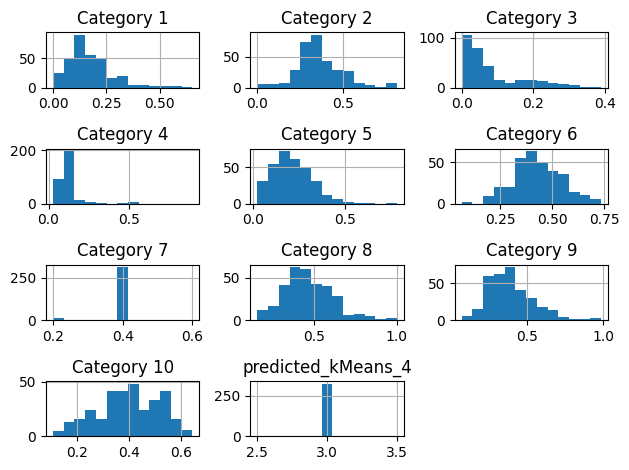

In [14]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()
# Add your code below
hist_k4_cluster_0 = df_k4_cluster_0.hist(bins =13)
plt.tight_layout()
hist_k4_cluster_1 = df_k4_cluster_1.hist(bins =13)
plt.tight_layout()
hist_k4_cluster_2 = df_k4_cluster_2.hist(bins =13)
plt.tight_layout()
hist_k4_cluster_3 = df_k4_cluster_3.hist(bins =13)
plt.tight_layout()


Are the Category 3 and Category 10 distributions still different among the 4 groups of observations obtained?

**Q14. Make boxplots of Category 3 and Category 10, grouping by `predicted_kMeans_4`.**


Store your plots in two variables called `box_plot10_k4` and `box_plot3_k4` respectively.

*Hint: In this case you should use `df_scaled_predictions_4`.*

*Use the `plt.suptitle("")` method after each call to the `.boxplot()` method, to create a better visualization of the plots.*

Text(0.5, 0.98, '')

<Figure size 640x480 with 0 Axes>

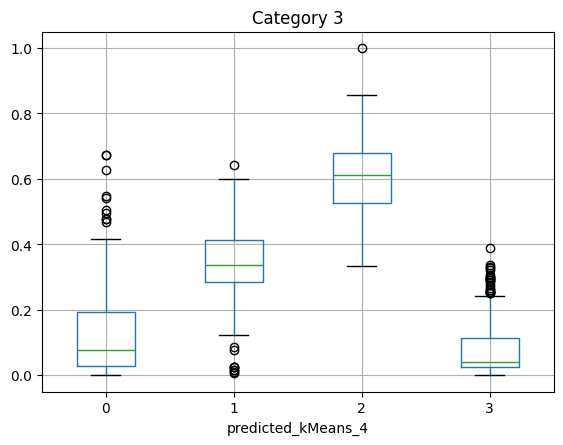

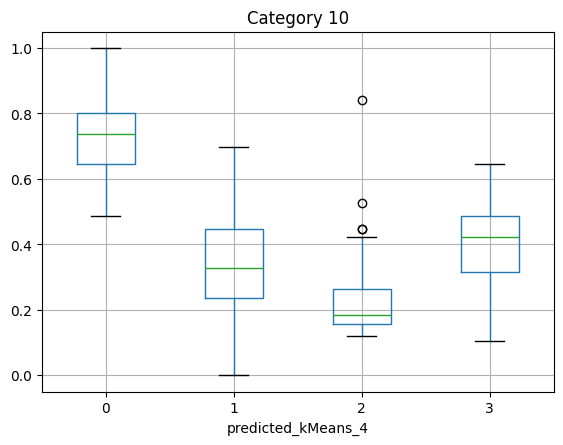

In [15]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()
# Add your code below
box_plot3_k4 = df_scaled_predictions_4.boxplot(column=['Category 3'], by='predicted_kMeans_4')
plt.suptitle("")
box_plot10_k4 = df_scaled_predictions_4.boxplot(column=['Category 10'], by='predicted_kMeans_4')
plt.suptitle("")


**Q15. When using `k = 2`, how many elements are present in each cluster? Store your answer in a variable called `distribution_2_clusters`.**


**Note**: your answer should be a Pandas Series, with the cluster label as the index and the count as value.

*Hint: you can use the `.value_counts()` method.*

In [16]:
# Add your code below
distribution_2_clusters = df_scaled_predictions_2['predicted_kMeans_2'].value_counts()
distribution_2_clusters


predicted_kMeans_2
0    628
1    352
Name: count, dtype: int64

**Q16. When using `k = 4`, how many elements are present in each cluster? Store your answer in a variable called `distribution_4_clusters`.**


**Note**: your answer should be a Pandas Series, with the cluster label as the index and the count as value.

*Hint: you can use the `.value_counts()` method.*

In [17]:
# Add your code below
distribution_4_clusters = df_scaled_predictions_4['predicted_kMeans_4'].value_counts()
distribution_4_clusters


predicted_kMeans_4
3    324
0    242
1    236
2    178
Name: count, dtype: int64